=== DIABETES PREDICTION SYSTEM ===
Creating sample dataset...
Dataset shape: (1000, 9)

=== DATA EXPLORATION ===

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               1000 non-null   int32  
 1   Glucose                   1000 non-null   float64
 2   BloodPressure             1000 non-null   float64
 3   SkinThickness             1000 non-null   float64
 4   Insulin                   1000 non-null   float64
 5   BMI                       1000 non-null   float64
 6   DiabetesPedigreeFunction  1000 non-null   float64
 7   Age                       1000 non-null   float64
 8   Outcome                   1000 non-null   int64  
dtypes: float64(7), int32(1), int64(1)
memory usage: 66.5 KB
None

Dataset Description:
       Pregnancies      Glucose  BloodPressure  SkinThickness      Insulin

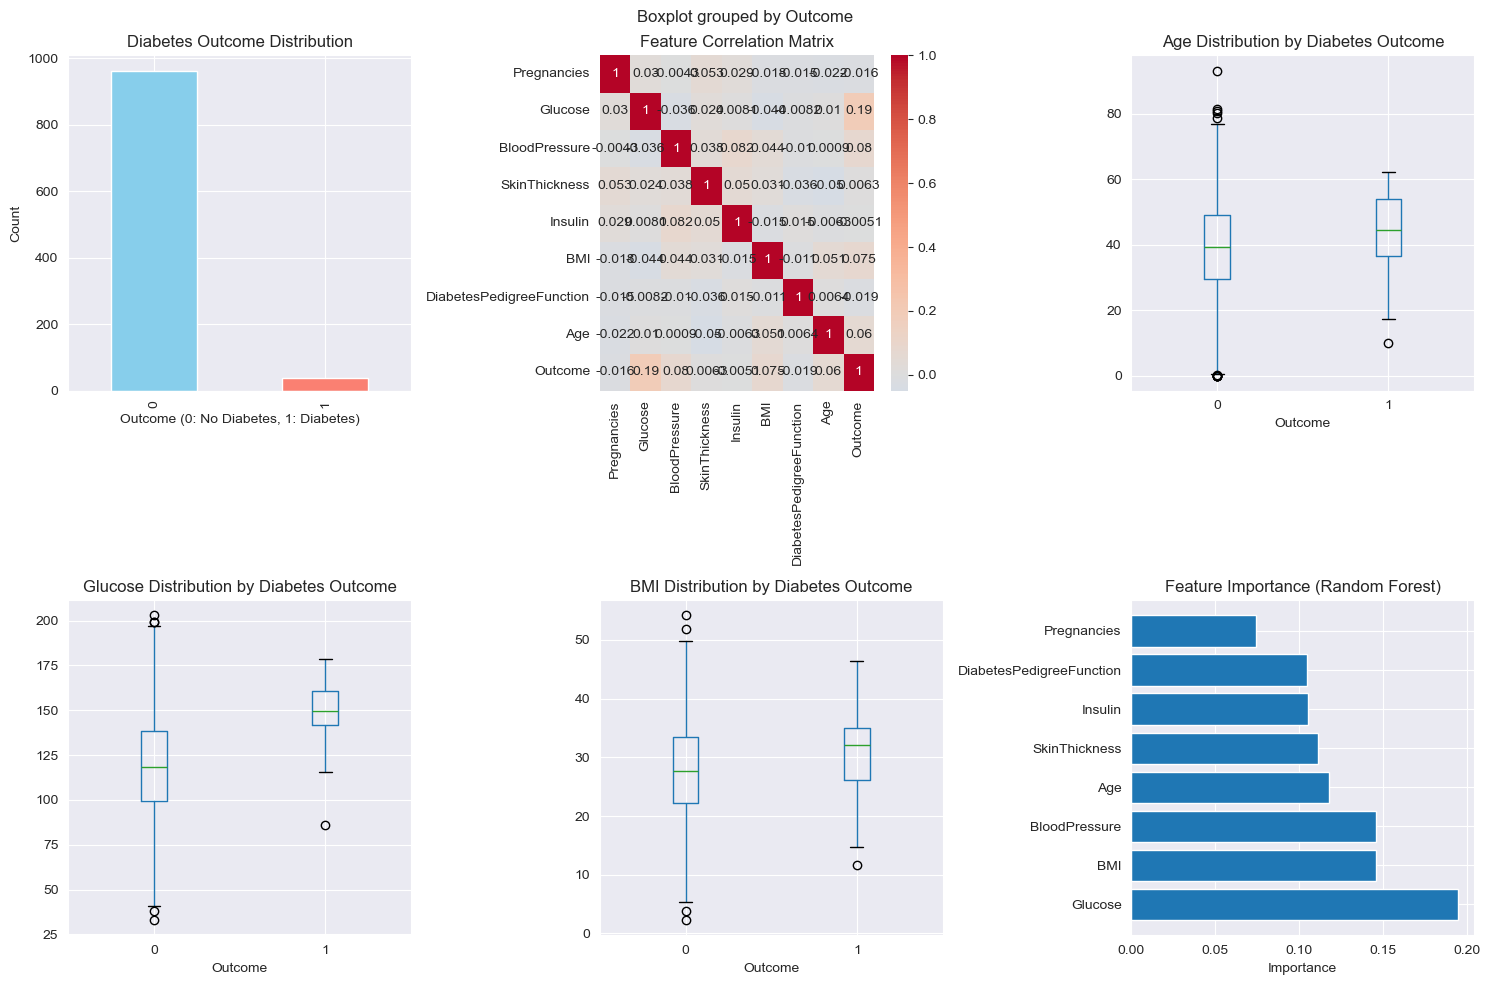


=== DATA PREPROCESSING ===
Training set shape: (800, 8)
Test set shape: (200, 8)
Training set diabetes rate: 3.88%
Test set diabetes rate: 4.00%

=== MODEL TRAINING ===

Training Logistic Regression...
Accuracy: 0.9600
AUC Score: 0.8490
CV Score: 0.9613 (+/- 0.0050)

Training Random Forest...
Accuracy: 0.9650
AUC Score: 0.7487
CV Score: 0.9613 (+/- 0.0050)

Training Gradient Boosting...
Accuracy: 0.9600
AUC Score: 0.7396
CV Score: 0.9625 (+/- 0.0079)

Training Support Vector Machine...
Accuracy: 0.9600
AUC Score: 0.5319
CV Score: 0.9613 (+/- 0.0050)

Training K-Nearest Neighbors...
Accuracy: 0.9600
AUC Score: 0.4958
CV Score: 0.9587 (+/- 0.0100)

Training Naive Bayes...
Accuracy: 0.9600
AUC Score: 0.8490
CV Score: 0.9613 (+/- 0.0050)

Training Decision Tree...
Accuracy: 0.9200
AUC Score: 0.5990
CV Score: 0.9300 (+/- 0.0436)

=== MODEL EVALUATION ===

Model Comparison:
                 Model  Accuracy  AUC Score  CV Mean   CV Std
         Random Forest     0.965   0.748698  0.96125 0.0

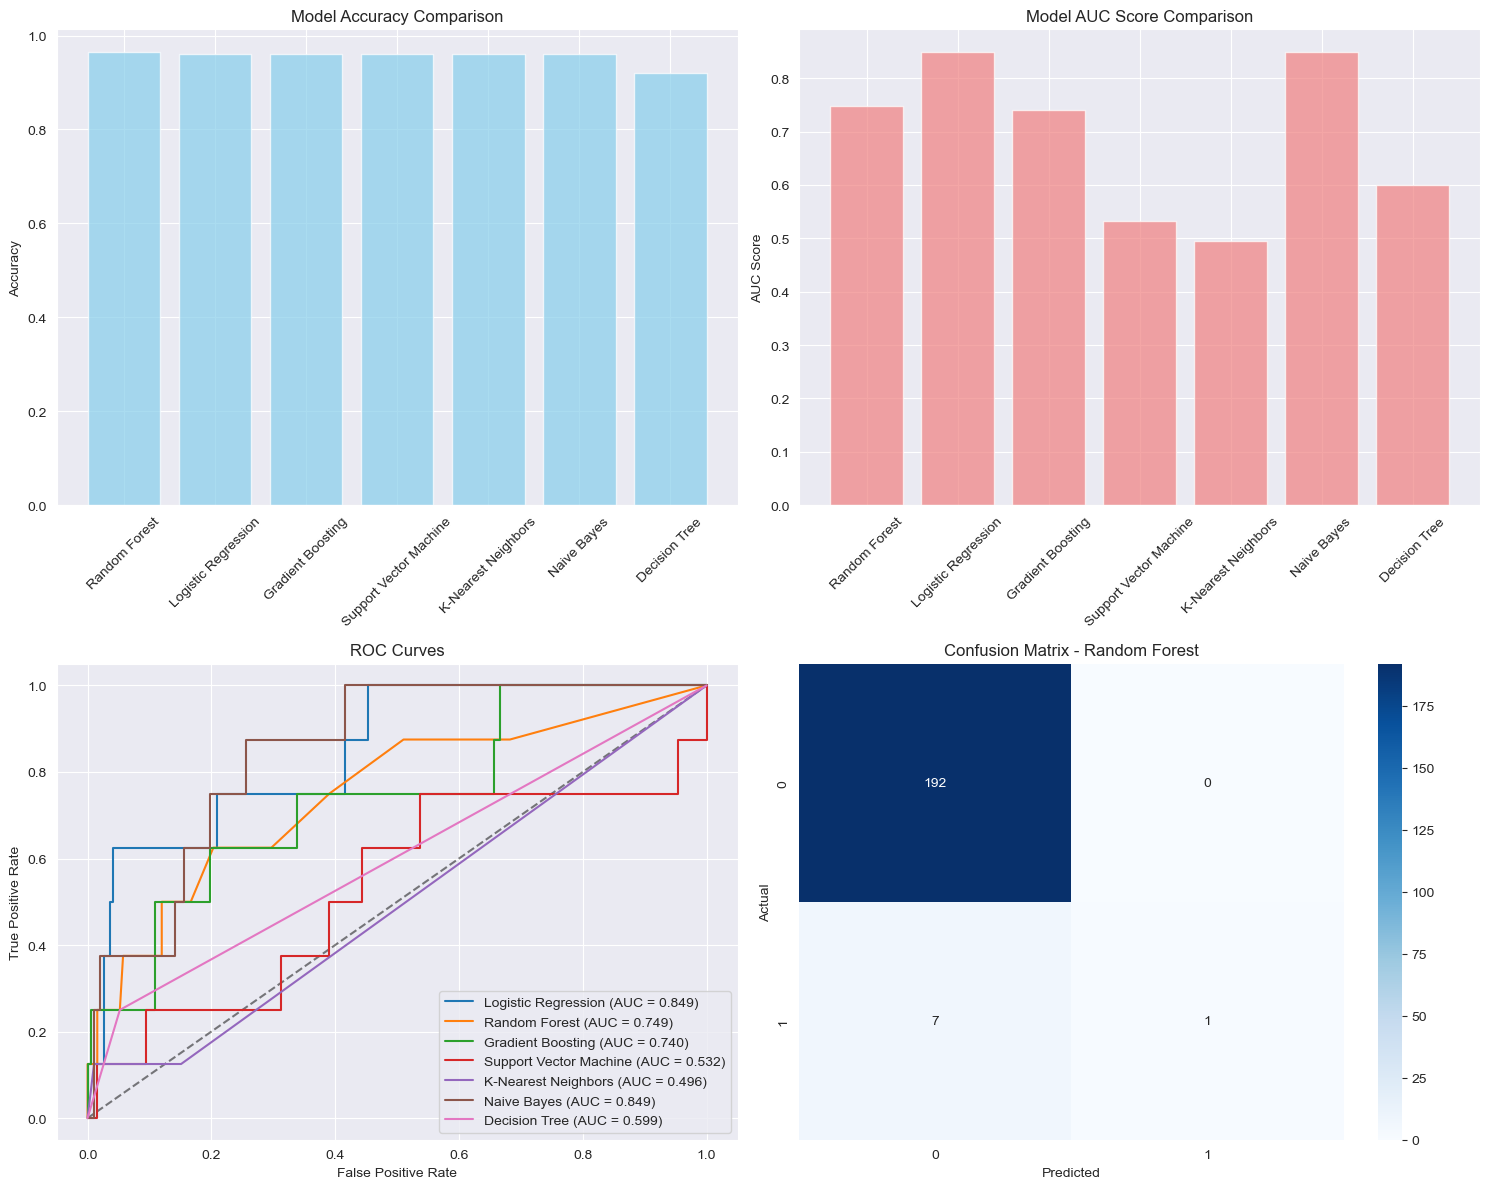


Best Model: Random Forest
Best Accuracy: 0.9650

Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       192
           1       1.00      0.12      0.22         8

    accuracy                           0.96       200
   macro avg       0.98      0.56      0.60       200
weighted avg       0.97      0.96      0.95       200


=== HYPERPARAMETER TUNING FOR RANDOM FOREST ===
Fitting 5 folds for each of 108 candidates, totalling 540 fits


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve, precision_recall_curve
import warnings
warnings.filterwarnings('ignore')

class DiabetesPredictionSystem:
    def __init__(self):
        self.models = {}
        self.scaler = StandardScaler()
        self.best_model = None
        self.best_score = 0
        self.X_train = None
        self.X_test = None
        self.y_train = None
        self.y_test = None

    def create_sample_data(self, n_samples=1000):
        """Create sample diabetes dataset for demonstration"""
        np.random.seed(42)

        # Generate synthetic diabetes data
        data = {
            'Pregnancies': np.random.poisson(3, n_samples),
            'Glucose': np.random.normal(120, 30, n_samples),
            'BloodPressure': np.random.normal(80, 15, n_samples),
            'SkinThickness': np.random.normal(25, 10, n_samples),
            'Insulin': np.random.normal(100, 50, n_samples),
            'BMI': np.random.normal(28, 8, n_samples),
            'DiabetesPedigreeFunction': np.random.exponential(0.5, n_samples),
            'Age': np.random.normal(40, 15, n_samples)
        }

        # Create realistic correlations for diabetes outcome
        diabetes_prob = (
            0.1 * (data['Glucose'] > 140) +
            0.08 * (data['BMI'] > 30) +
            0.05 * (data['Age'] > 45) +
            0.03 * (data['BloodPressure'] > 90) +
            0.02 * (data['Pregnancies'] > 5) +
            np.random.normal(0, 0.1, n_samples)
        )

        data['Outcome'] = (diabetes_prob > 0.3).astype(int)

        # Clean the data
        for key in data:
            if key != 'Outcome':
                data[key] = np.maximum(data[key], 0)  # Remove negative values

        return pd.DataFrame(data)

    def load_data(self, file_path=None):
        """Load diabetes dataset"""
        if file_path is None:
            print("Creating sample dataset...")
            self.data = self.create_sample_data()
        else:
            try:
                self.data = pd.read_csv(file_path)
                print(f"Data loaded successfully from {file_path}")
            except Exception as e:
                print(f"Error loading data: {e}")
                print("Using sample dataset instead...")
                self.data = self.create_sample_data()

        print(f"Dataset shape: {self.data.shape}")
        return self.data

    def explore_data(self):
        """Perform exploratory data analysis"""
        print("\n=== DATA EXPLORATION ===")
        print("\nDataset Info:")
        print(self.data.info())

        print("\nDataset Description:")
        print(self.data.describe())

        print("\nTarget Distribution:")
        print(self.data['Outcome'].value_counts())

        print("\nMissing Values:")
        print(self.data.isnull().sum())

        # Visualizations
        plt.figure(figsize=(15, 10))

        # Target distribution
        plt.subplot(2, 3, 1)
        self.data['Outcome'].value_counts().plot(kind='bar', color=['skyblue', 'salmon'])
        plt.title('Diabetes Outcome Distribution')
        plt.xlabel('Outcome (0: No Diabetes, 1: Diabetes)')
        plt.ylabel('Count')

        # Correlation heatmap
        plt.subplot(2, 3, 2)
        correlation_matrix = self.data.corr()
        sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
        plt.title('Feature Correlation Matrix')

        # Age distribution by outcome
        plt.subplot(2, 3, 3)
        self.data.boxplot(column='Age', by='Outcome', ax=plt.gca())
        plt.title('Age Distribution by Diabetes Outcome')

        # Glucose distribution by outcome
        plt.subplot(2, 3, 4)
        self.data.boxplot(column='Glucose', by='Outcome', ax=plt.gca())
        plt.title('Glucose Distribution by Diabetes Outcome')

        # BMI distribution by outcome
        plt.subplot(2, 3, 5)
        self.data.boxplot(column='BMI', by='Outcome', ax=plt.gca())
        plt.title('BMI Distribution by Diabetes Outcome')

        # Feature importance (using Random Forest)
        plt.subplot(2, 3, 6)
        X = self.data.drop('Outcome', axis=1)
        y = self.data['Outcome']
        rf = RandomForestClassifier(n_estimators=100, random_state=42)
        rf.fit(X, y)
        feature_importance = pd.DataFrame({
            'feature': X.columns,
            'importance': rf.feature_importances_
        }).sort_values('importance', ascending=False)

        plt.barh(feature_importance['feature'], feature_importance['importance'])
        plt.title('Feature Importance (Random Forest)')
        plt.xlabel('Importance')

        plt.tight_layout()
        plt.show()

    def preprocess_data(self):
        """Preprocess the data for machine learning"""
        print("\n=== DATA PREPROCESSING ===")

        # Separate features and target
        X = self.data.drop('Outcome', axis=1)
        y = self.data['Outcome']

        # Handle missing values (replace 0s with median for certain features)
        zero_features = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
        for feature in zero_features:
            if feature in X.columns:
                X[feature] = X[feature].replace(0, X[feature].median())

        # Split the data
        self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(
            X, y, test_size=0.2, random_state=42, stratify=y
        )

        # Scale the features
        self.X_train_scaled = self.scaler.fit_transform(self.X_train)
        self.X_test_scaled = self.scaler.transform(self.X_test)

        print(f"Training set shape: {self.X_train.shape}")
        print(f"Test set shape: {self.X_test.shape}")
        print(f"Training set diabetes rate: {self.y_train.mean():.2%}")
        print(f"Test set diabetes rate: {self.y_test.mean():.2%}")

    def initialize_models(self):
        """Initialize all machine learning models"""
        self.models = {
            'Logistic Regression': LogisticRegression(random_state=42),
            'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
            'Gradient Boosting': GradientBoostingClassifier(random_state=42),
            'Support Vector Machine': SVC(probability=True, random_state=42),
            'K-Nearest Neighbors': KNeighborsClassifier(),
            'Naive Bayes': GaussianNB(),
            'Decision Tree': DecisionTreeClassifier(random_state=42)
        }

    def train_models(self):
        """Train all models and evaluate performance"""
        print("\n=== MODEL TRAINING ===")

        self.initialize_models()
        results = {}

        for name, model in self.models.items():
            print(f"\nTraining {name}...")

            # Use scaled data for models that benefit from scaling
            if name in ['Logistic Regression', 'Support Vector Machine', 'K-Nearest Neighbors']:
                X_train_use = self.X_train_scaled
                X_test_use = self.X_test_scaled
            else:
                X_train_use = self.X_train
                X_test_use = self.X_test

            # Train the model
            model.fit(X_train_use, self.y_train)

            # Make predictions
            y_pred = model.predict(X_test_use)
            y_pred_proba = model.predict_proba(X_test_use)[:, 1]

            # Calculate metrics
            accuracy = accuracy_score(self.y_test, y_pred)
            auc_score = roc_auc_score(self.y_test, y_pred_proba)

            # Cross-validation score
            cv_scores = cross_val_score(
                model, X_train_use, self.y_train, cv=5, scoring='accuracy'
            )

            results[name] = {
                'model': model,
                'accuracy': accuracy,
                'auc_score': auc_score,
                'cv_mean': cv_scores.mean(),
                'cv_std': cv_scores.std(),
                'y_pred': y_pred,
                'y_pred_proba': y_pred_proba
            }

            print(f"Accuracy: {accuracy:.4f}")
            print(f"AUC Score: {auc_score:.4f}")
            print(f"CV Score: {cv_scores.mean():.4f} (+/- {cv_scores.std() * 2:.4f})")

            # Update best model
            if accuracy > self.best_score:
                self.best_score = accuracy
                self.best_model = model
                self.best_model_name = name

        self.results = results
        return results

    def evaluate_models(self):
        """Detailed evaluation of all models"""
        print("\n=== MODEL EVALUATION ===")

        # Create comparison DataFrame
        comparison = pd.DataFrame({
            'Model': self.results.keys(),
            'Accuracy': [r['accuracy'] for r in self.results.values()],
            'AUC Score': [r['auc_score'] for r in self.results.values()],
            'CV Mean': [r['cv_mean'] for r in self.results.values()],
            'CV Std': [r['cv_std'] for r in self.results.values()]
        })

        comparison = comparison.sort_values('Accuracy', ascending=False)
        print("\nModel Comparison:")
        print(comparison.to_string(index=False))

        # Visualizations
        fig, axes = plt.subplots(2, 2, figsize=(15, 12))

        # Model comparison bar plot
        axes[0, 0].bar(comparison['Model'], comparison['Accuracy'],
                      color='skyblue', alpha=0.7)
        axes[0, 0].set_title('Model Accuracy Comparison')
        axes[0, 0].set_ylabel('Accuracy')
        axes[0, 0].tick_params(axis='x', rotation=45)

        # AUC comparison
        axes[0, 1].bar(comparison['Model'], comparison['AUC Score'],
                      color='lightcoral', alpha=0.7)
        axes[0, 1].set_title('Model AUC Score Comparison')
        axes[0, 1].set_ylabel('AUC Score')
        axes[0, 1].tick_params(axis='x', rotation=45)

        # ROC Curves
        axes[1, 0].plot([0, 1], [0, 1], 'k--', alpha=0.5)
        for name, result in self.results.items():
            fpr, tpr, _ = roc_curve(self.y_test, result['y_pred_proba'])
            axes[1, 0].plot(fpr, tpr, label=f"{name} (AUC = {result['auc_score']:.3f})")
        axes[1, 0].set_xlabel('False Positive Rate')
        axes[1, 0].set_ylabel('True Positive Rate')
        axes[1, 0].set_title('ROC Curves')
        axes[1, 0].legend()

        # Confusion Matrix for best model
        cm = confusion_matrix(self.y_test, self.results[self.best_model_name]['y_pred'])
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[1, 1])
        axes[1, 1].set_title(f'Confusion Matrix - {self.best_model_name}')
        axes[1, 1].set_xlabel('Predicted')
        axes[1, 1].set_ylabel('Actual')

        plt.tight_layout()
        plt.show()

        print(f"\nBest Model: {self.best_model_name}")
        print(f"Best Accuracy: {self.best_score:.4f}")

        # Detailed classification report for best model
        print(f"\nClassification Report for {self.best_model_name}:")
        print(classification_report(self.y_test, self.results[self.best_model_name]['y_pred']))

    def hyperparameter_tuning(self, model_name='Random Forest'):
        """Perform hyperparameter tuning for selected model"""
        print(f"\n=== HYPERPARAMETER TUNING FOR {model_name.upper()} ===")

        if model_name == 'Random Forest':
            param_grid = {
                'n_estimators': [50, 100, 200],
                'max_depth': [5, 10, 15, None],
                'min_samples_split': [2, 5, 10],
                'min_samples_leaf': [1, 2, 4]
            }
            model = RandomForestClassifier(random_state=42)
            X_use = self.X_train

        elif model_name == 'Logistic Regression':
            param_grid = {
                'C': [0.1, 1, 10, 100],
                'penalty': ['l1', 'l2'],
                'solver': ['liblinear', 'lbfgs']
            }
            model = LogisticRegression(random_state=42)
            X_use = self.X_train_scaled

        elif model_name == 'Support Vector Machine':
            param_grid = {
                'C': [0.1, 1, 10, 100],
                'gamma': ['scale', 'auto', 0.1, 1],
                'kernel': ['rbf', 'linear', 'poly']
            }
            model = SVC(probability=True, random_state=42)
            X_use = self.X_train_scaled

        # Perform grid search
        grid_search = GridSearchCV(
            model, param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=1
        )
        grid_search.fit(X_use, self.y_train)

        print(f"Best parameters: {grid_search.best_params_}")
        print(f"Best cross-validation score: {grid_search.best_score_:.4f}")

        # Evaluate tuned model
        if model_name in ['Logistic Regression', 'Support Vector Machine']:
            X_test_use = self.X_test_scaled
        else:
            X_test_use = self.X_test

        tuned_predictions = grid_search.predict(X_test_use)
        tuned_accuracy = accuracy_score(self.y_test, tuned_predictions)

        print(f"Tuned model test accuracy: {tuned_accuracy:.4f}")

        return grid_search.best_estimator_

    def predict_diabetes(self, patient_data):
        """Predict diabetes for new patient data"""
        if self.best_model is None:
            raise ValueError("No model trained yet. Please train models first.")

        # Convert to DataFrame if it's a dictionary
        if isinstance(patient_data, dict):
            patient_data = pd.DataFrame([patient_data])

        # Scale the data if needed
        if self.best_model_name in ['Logistic Regression', 'Support Vector Machine', 'K-Nearest Neighbors']:
            patient_data_scaled = self.scaler.transform(patient_data)
            prediction = self.best_model.predict(patient_data_scaled)
            probability = self.best_model.predict_proba(patient_data_scaled)[:, 1]
        else:
            prediction = self.best_model.predict(patient_data)
            probability = self.best_model.predict_proba(patient_data)[:, 1]

        return prediction[0], probability[0]

    def run_complete_analysis(self, file_path=None):
        """Run the complete diabetes prediction analysis"""
        print("=== DIABETES PREDICTION SYSTEM ===")

        # Load and explore data
        self.load_data(file_path)
        self.explore_data()

        # Preprocess data
        self.preprocess_data()

        # Train models
        self.train_models()

        # Evaluate models
        self.evaluate_models()

        # Hyperparameter tuning for best model
        if self.best_model_name in ['Random Forest', 'Logistic Regression', 'Support Vector Machine']:
            tuned_model = self.hyperparameter_tuning(self.best_model_name)
            self.best_model = tuned_model

        print("\n=== ANALYSIS COMPLETE ===")
        return self.results

# Example usage
if __name__ == "__main__":
    # Initialize the system
    diabetes_system = DiabetesPredictionSystem()

    # Run complete analysis
    # If you have a diabetes dataset, replace None with the file path
    results = diabetes_system.run_complete_analysis(file_path=None)

    # Example prediction for a new patient
    new_patient = {
        'Pregnancies': 2,
        'Glucose': 140,
        'BloodPressure': 85,
        'SkinThickness': 25,
        'Insulin': 100,
        'BMI': 30.5,
        'DiabetesPedigreeFunction': 0.8,
        'Age': 45
    }

    prediction, probability = diabetes_system.predict_diabetes(new_patient)

    print(f"\n=== NEW PATIENT PREDICTION ===")
    print(f"Patient Data: {new_patient}")
    print(f"Prediction: {'Diabetes' if prediction == 1 else 'No Diabetes'}")
    print(f"Probability of Diabetes: {probability:.2%}")

    # Risk assessment
    if probability < 0.3:
        risk_level = "Low"
    elif probability < 0.7:
        risk_level = "Moderate"
    else:
        risk_level = "High"

    print(f"Risk Level: {risk_level}")